In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

data=np.load('mnist.npz')
inputs, targets = data['x_test'], data['y_test']

aux=np.load('preds.npz')
softmax, preds = aux['softmax'], aux['predicted_classes']

print(inputs.shape)
print(softmax.shape)
print(targets.shape)
print(preds.shape)

(10000, 28, 28)
(10000, 10)
(10000,)
(10000,)


In [2]:
def plot_embeds(embeddings, labels, correct, title=''):
    for i in range(10):
        idxs = (labels==i) * correct
        plt.plot(embeddings[:,0][idxs], embeddings[:,1][idxs], '.', alpha=0.1)
    for i in range(10):
        idxs = (labels==i) * np.logical_not(correct)
        plt.plot(embeddings[:,0][idxs], embeddings[:,1][idxs], '.')
    plt.legend([str(c) for c in range(10)])
    plt.title(title)
    plt.show()

Clustering based on softmax output; colors based on true class

In [3]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = TSNE(n_components=2, early_exaggeration=12.0).fit_transform(scaled)

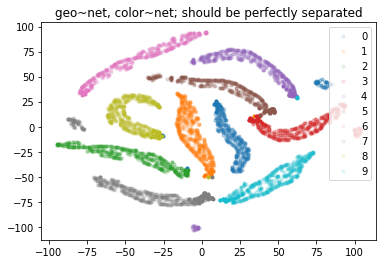

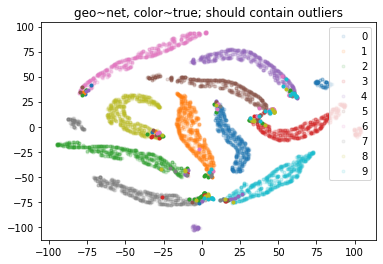

In [4]:
plot_embeds(embeddings, preds, targets==preds, title='geo~net, color~net; should be perfectly separated')
plot_embeds(embeddings, targets, targets==preds, title='geo~net, color~true; should contain outliers')

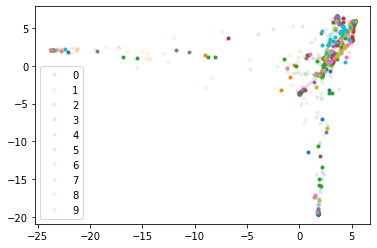

In [5]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = LinearDiscriminantAnalysis(n_components=2).fit_transform(scaled, targets)
plot_embeds(embeddings, targets, targets==preds)

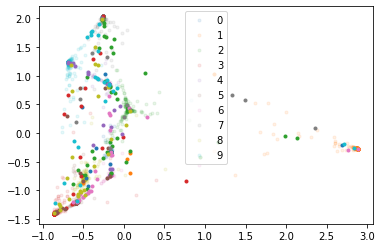

In [6]:
scaled = StandardScaler().fit_transform(softmax)
embeddings = PCA(n_components=2,svd_solver='auto').fit_transform(scaled)
plot_embeds(embeddings, targets, targets==preds)

Clustering based on whole image data; colors based on prediction

In [7]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = TSNE(n_components=2).fit_transform(scaled, targets)

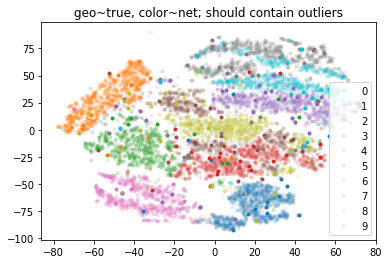

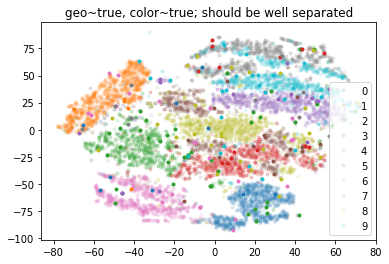

In [8]:
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')

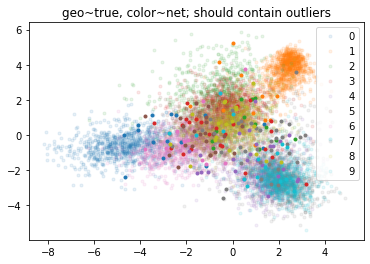

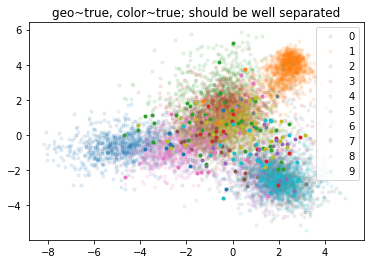

In [9]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = LinearDiscriminantAnalysis(n_components=2).fit_transform(scaled, targets)
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')

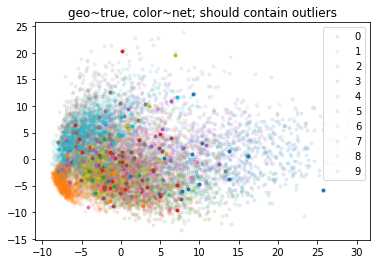

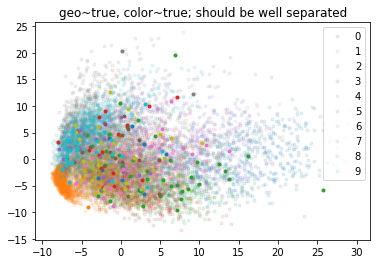

In [10]:
scaled = StandardScaler().fit_transform(inputs.reshape(-1,28*28))
embeddings = PCA(n_components=2,svd_solver='auto').fit_transform(scaled)
plot_embeds(embeddings, preds, targets==preds, title='geo~true, color~net; should contain outliers')
plot_embeds(embeddings, targets, targets==preds, title='geo~true, color~true; should be well separated')